In [1]:
import pandas as pd 
import numpy as np
from pandas import DataFrame as df
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Dense, Dropout

In [2]:
train_vals = pd.read_csv('LOANS_TRAIN.csv', index_col='id')
X_train = train_vals.iloc[:, :-1]
y_train = train_vals.iloc[:, -1]
X_test = pd.read_csv('LOANS_TEST.csv', index_col='id')

In [3]:
percent = ['int_rate', 'revol_util']
for col in percent:
    train_vals[col] = pd.to_numeric(train_vals[col].str.strip('%')).div(100)
    
loan_mapping = {'Fully Paid': 0, 'Charged Off': 1}
train_vals = train_vals.replace({"loan_status": loan_mapping})

In [4]:
num_features = train_vals.select_dtypes(include=['int64', 'float64']).columns
cat_features = train_vals.select_dtypes(include=['object']).columns

In [5]:
num_features

Index(['loan_amnt', 'term_(months)', 'int_rate', 'installment', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_status'],
      dtype='object')

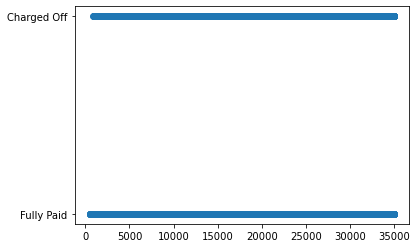

In [6]:
plt.scatter(np.asarray(X_train['loan_amnt']), y_train)

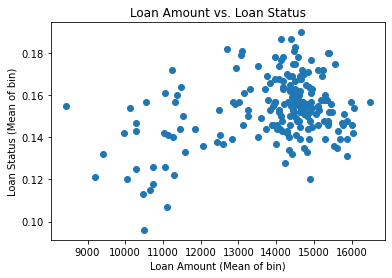

In [7]:
train_vals.sort_values(by=['loan_amnt'])
x_compile = []
y_compile = []
for i in range(0, 197):
    x_compile.append(np.mean(np.asarray(train_vals['loan_amnt'])[i*1000:(i+1)*1000]))
    y_compile.append(np.mean(np.asarray(train_vals['loan_status'])[i*1000:(i+1)*1000]))
fig1 = plt.scatter(x_compile, y_compile)
plt.title("Loan Amount vs. Loan Status")
plt.xlabel("Loan Amount (Mean of bin)")
plt.ylabel("Loan Status (Mean of bin)")
plt.savefig("loan_amt.png")

Text(0, 0.5, 'Loan Status (Mean of bin)')

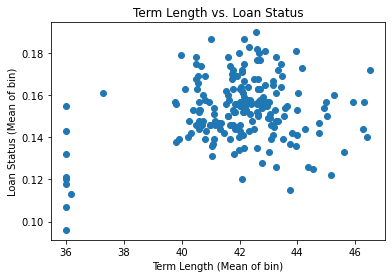

In [52]:
train_vals.sort_values(by=['term_(months)'])
x_compile = []
y_compile = []
for i in range(0, 197):
    x_compile.append(np.mean(np.asarray(train_vals['term_(months)'])[i*1000:(i+1)*1000]))
    y_compile.append(np.mean(np.asarray(train_vals['loan_status'])[i*1000:(i+1)*1000]))
plt.scatter(x_compile, y_compile)
plt.title("Term Length vs. Loan Status")
plt.xlabel("Term Length (Mean of bin)")
plt.ylabel("Loan Status (Mean of bin)")

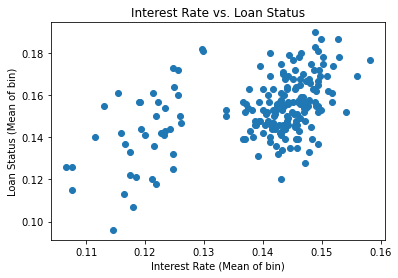

In [66]:
train_vals.sort_values(by=['int_rate'])
x_compile = []
y_compile = []
for i in range(0, 197):
    x_compile.append(np.mean(np.asarray(train_vals['int_rate'])[i*1000:(i+1)*1000]))
    y_compile.append(np.mean(np.asarray(train_vals['loan_status'])[i*1000:(i+1)*1000]))
plt.scatter(x_compile, y_compile)
plt.title("Interest Rate vs. Loan Status")
plt.xlabel("Interest Rate (Mean of bin)")
plt.ylabel("Loan Status (Mean of bin)")
plt.savefig("interest_rate.png")

Text(0, 0.5, 'Loan Status (Mean of bin)')

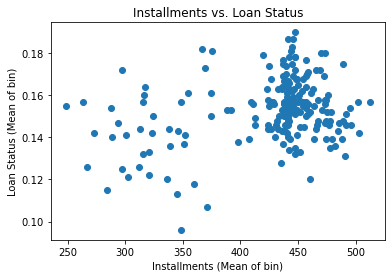

In [48]:
train_vals.sort_values(by=['installment'])
x_compile = []
y_compile = []
for i in range(0, 197):
    x_compile.append(np.mean(np.asarray(train_vals['installment'])[i*1000:(i+1)*1000]))
    y_compile.append(np.mean(np.asarray(train_vals['loan_status'])[i*1000:(i+1)*1000]))
plt.scatter(x_compile, y_compile)
plt.title("Installments vs. Loan Status")
plt.xlabel("Installments (Mean of bin)")
plt.ylabel("Loan Status (Mean of bin)")

Text(0, 0.5, 'Loan Status (Mean of bin)')

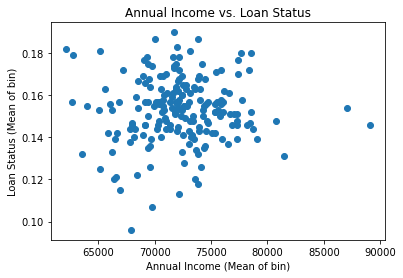

In [53]:
train_vals.sort_values(by=['annual_inc'])
x_compile = []
y_compile = []
for i in range(0, 197):
    x_compile.append(np.mean(np.asarray(train_vals['annual_inc'])[i*1000:(i+1)*1000]))
    y_compile.append(np.mean(np.asarray(train_vals['loan_status'])[i*1000:(i+1)*1000]))
plt.scatter(x_compile, y_compile)
plt.title("Annual Income vs. Loan Status")
plt.xlabel("Annual Income (Mean of bin)")
plt.ylabel("Loan Status (Mean of bin)")

Text(0, 0.5, 'Loan Status (Mean of bin)')

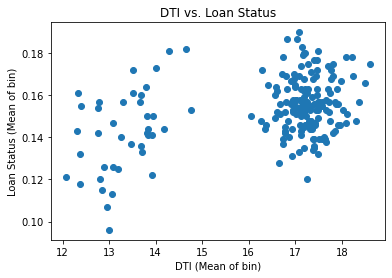

In [55]:
train_vals.sort_values(by=['dti'])
x_compile = []
y_compile = []
for i in range(0, 197):
    x_compile.append(np.mean(np.asarray(train_vals['dti'])[i*1000:(i+1)*1000]))
    y_compile.append(np.mean(np.asarray(train_vals['loan_status'])[i*1000:(i+1)*1000]))
plt.scatter(x_compile, y_compile)
plt.title("DTI vs. Loan Status")
plt.xlabel("DTI (Mean of bin)")
plt.ylabel("Loan Status (Mean of bin)")

In [54]:
num_features

Index(['loan_amnt', 'term_(months)', 'int_rate', 'installment', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_status'],
      dtype='object')

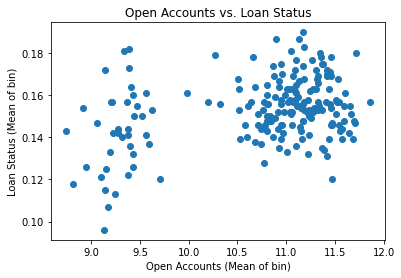

In [67]:
train_vals.sort_values(by=['open_acc'])
x_compile = []
y_compile = []
for i in range(0, 197):
    x_compile.append(np.mean(np.asarray(train_vals['open_acc'])[i*1000:(i+1)*1000]))
    y_compile.append(np.mean(np.asarray(train_vals['loan_status'])[i*1000:(i+1)*1000]))
plt.scatter(x_compile, y_compile)
plt.title("Open Accounts vs. Loan Status")
plt.xlabel("Open Accounts (Mean of bin)")
plt.ylabel("Loan Status (Mean of bin)")
plt.savefig("open_acc.png")

Text(0, 0.5, 'Loan Status (Mean of bin)')

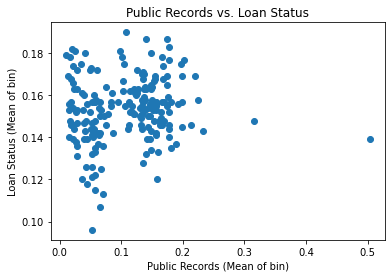

In [57]:
train_vals.sort_values(by=['pub_rec'])
x_compile = []
y_compile = []
for i in range(0, 197):
    x_compile.append(np.mean(np.asarray(train_vals['pub_rec'])[i*1000:(i+1)*1000]))
    y_compile.append(np.mean(np.asarray(train_vals['loan_status'])[i*1000:(i+1)*1000]))
plt.scatter(x_compile, y_compile)
plt.title("Public Records vs. Loan Status")
plt.xlabel("Public Records (Mean of bin)")
plt.ylabel("Loan Status (Mean of bin)")

Text(0, 0.5, 'Loan Status (Mean of bin)')

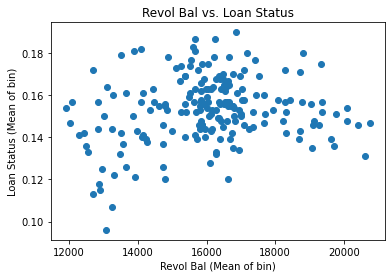

In [58]:
train_vals.sort_values(by=['revol_bal'])
x_compile = []
y_compile = []
for i in range(0, 197):
    x_compile.append(np.mean(np.asarray(train_vals['revol_bal'])[i*1000:(i+1)*1000]))
    y_compile.append(np.mean(np.asarray(train_vals['loan_status'])[i*1000:(i+1)*1000]))
plt.scatter(x_compile, y_compile)
plt.title("Revol Bal vs. Loan Status")
plt.xlabel("Revol Bal (Mean of bin)")
plt.ylabel("Loan Status (Mean of bin)")

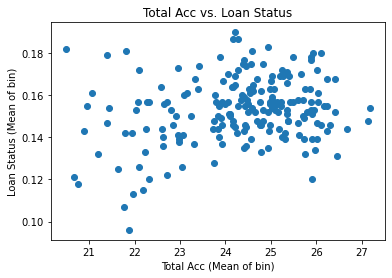

In [68]:
train_vals.sort_values(by=['total_acc'])
x_compile = []
y_compile = []
for i in range(0, 197):
    x_compile.append(np.mean(np.asarray(train_vals['total_acc'])[i*1000:(i+1)*1000]))
    y_compile.append(np.mean(np.asarray(train_vals['loan_status'])[i*1000:(i+1)*1000]))
plt.scatter(x_compile, y_compile)
plt.title("Total Acc vs. Loan Status")
plt.xlabel("Total Acc (Mean of bin)")
plt.ylabel("Loan Status (Mean of bin)")
plt.savefig("total_acc.png")

Text(0, 0.5, 'Loan Status (Mean of bin)')

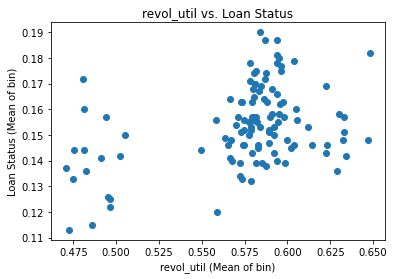

In [61]:
train_vals.sort_values(by=['revol_util'])
x_compile = []
y_compile = []
for i in range(0, 197):
    x_compile.append(np.mean(np.asarray(train_vals['revol_util'])[i*1000:(i+1)*1000]))
    y_compile.append(np.mean(np.asarray(train_vals['loan_status'])[i*1000:(i+1)*1000]))
plt.scatter(x_compile, y_compile)
plt.title("revol_util vs. Loan Status")
plt.xlabel("revol_util (Mean of bin)")
plt.ylabel("Loan Status (Mean of bin)")

In [60]:
num_features

Index(['loan_amnt', 'term_(months)', 'int_rate', 'installment', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_status'],
      dtype='object')

Text(0, 0.5, 'Loan Status (Mean of bin)')

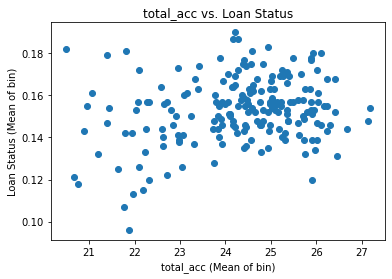

In [62]:
train_vals.sort_values(by=['total_acc'])
x_compile = []
y_compile = []
for i in range(0, 197):
    x_compile.append(np.mean(np.asarray(train_vals['total_acc'])[i*1000:(i+1)*1000]))
    y_compile.append(np.mean(np.asarray(train_vals['loan_status'])[i*1000:(i+1)*1000]))
plt.scatter(x_compile, y_compile)
plt.title("total_acc vs. Loan Status")
plt.xlabel("total_acc (Mean of bin)")
plt.ylabel("Loan Status (Mean of bin)")

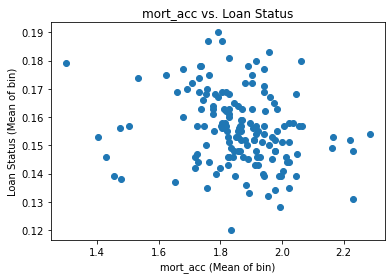

In [69]:
train_vals.sort_values(by=['mort_acc'])
x_compile = []
y_compile = []
for i in range(0, 197):
    x_compile.append(np.mean(np.asarray(train_vals['mort_acc'])[i*1000:(i+1)*1000]))
    y_compile.append(np.mean(np.asarray(train_vals['loan_status'])[i*1000:(i+1)*1000]))
plt.scatter(x_compile, y_compile)
plt.title("mort_acc vs. Loan Status")
plt.xlabel("mort_acc (Mean of bin)")
plt.ylabel("Loan Status (Mean of bin)")
plt.savefig("mort_acc.png")

Text(0, 0.5, 'Loan Status (Mean of bin)')

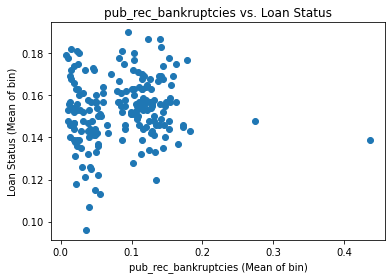

In [64]:
train_vals.sort_values(by=['pub_rec_bankruptcies'])
x_compile = []
y_compile = []
for i in range(0, 197):
    x_compile.append(np.mean(np.asarray(train_vals['pub_rec_bankruptcies'])[i*1000:(i+1)*1000]))
    y_compile.append(np.mean(np.asarray(train_vals['loan_status'])[i*1000:(i+1)*1000]))
plt.scatter(x_compile, y_compile)
plt.title("pub_rec_bankruptcies vs. Loan Status")
plt.xlabel("pub_rec_bankruptcies (Mean of bin)")
plt.ylabel("Loan Status (Mean of bin)")

AttributeError: 'PathCollection' object has no attribute 'show'